<a href="https://colab.research.google.com/github/vidjaydas/DS_Assignments/blob/main/Hierarchical_Cluster_Assignment_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing Hierarchical Clustering method for the Airlines data.

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns

In [13]:
data = pd.read_excel(r'/content/EastWestAirlines.xlsx', sheet_name='data')

In [14]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
data.shape

(3999, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [17]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [23]:
# Normalized function
def norm_func(i):
    x = (i-i.min())/i.max()-i.min()
    return(x)


In [24]:
#Normalized data frame
#Ignore the 1st column i.e. ID#
df_norm = norm_func(data.iloc[:,1:])

In [25]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,-1.0,-1.0,-1.0,0.032330,0.046512,0.006490,0.018868,-1.831123,1.0
3995,0.037766,0.0,-1.0,-1.0,-1.0,0.003720,0.058140,0.000000,0.000000,-1.832088,1.0
3996,0.043169,0.0,-0.6,-1.0,-1.0,0.096505,0.093023,0.000000,0.000000,-1.831244,1.0
3997,0.032202,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.016225,0.018868,-1.831365,0.0


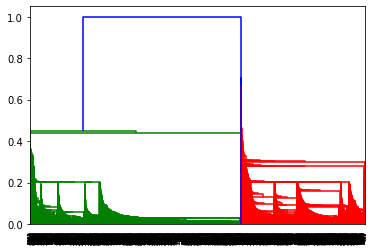

In [26]:
#Create Dendrogram
Dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

In [29]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [31]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)

In [33]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [35]:
# Create a new data frame for clusters number
clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [36]:
clusters.iloc[:10,:]

,Clusters
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [37]:
df_norm['h_clusterid'] = clusters

In [38]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0,1
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0,1
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0,1
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0,1
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,-1.0,-1.0,-1.0,0.032330,0.046512,0.006490,0.018868,-1.831123,1.0,0
3995,0.037766,0.0,-1.0,-1.0,-1.0,0.003720,0.058140,0.000000,0.000000,-1.832088,1.0,0
3996,0.043169,0.0,-0.6,-1.0,-1.0,0.096505,0.093023,0.000000,0.000000,-1.831244,1.0,0
3997,0.032202,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.016225,0.018868,-1.831365,0.0,1


In [39]:
data['h_clusterid'] = clusters

In [40]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1
